In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
# Renaming the cols for easier understaning
df_day.rename(columns={'instant':'id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)
# Marking categorical cols as category
df_day['season'] = df_day.season.astype('category')
df_day['year'] = df_day.year.astype('category')
df_day['month'] = df_day.month.astype('category')
df_day['holiday'] = df_day.holiday.astype('category')
df_day['weekday'] = df_day.weekday.astype('category')
df_day['workingday'] = df_day.workingday.astype('category')
df_day['weather_condition'] = df_day.weather_condition.astype('category')
df_day['datetime'] = pd.to_datetime(df_day.datetime)



1.   Season: -1 Spring | 2 Summer | 3 Fall | 4 Winter
2.   Holiday: 0 No | 1 Yes
3.   Weather:

      1: Clear, Few clouds, Partly cloudy, Partly cloudy

      2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

      3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

      4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

4.    holiday : weather day is holiday or not
5.    weekday : day of the week
6.    workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
7.    temp : Normalized temperature in Celsius. The values are divided to 41 (max)
8.    atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
6.    windspeed: Normalized wind speed. The values are divided to 67 (max)
7.    hum: Normalized humidity. The values are divided to 100 (max)






# 1) What are the data types? (Only numeric and categorical)

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 731 non-null    int64         
 1   datetime           731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

Categorical Data: Season, Year, Month, Holiday, Weekday, WorkingDay, Weather Condition

Numerical / Continuous Data: Temp, A Temp, Humidity, Casual, Registered

Target: Count

# 2) Are there missing values?

In [6]:
df_day.isnull().sum()

id                   0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

No null values in the dataset.

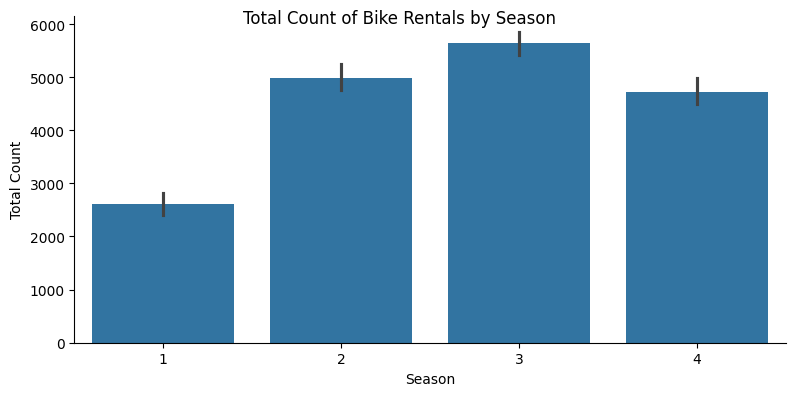

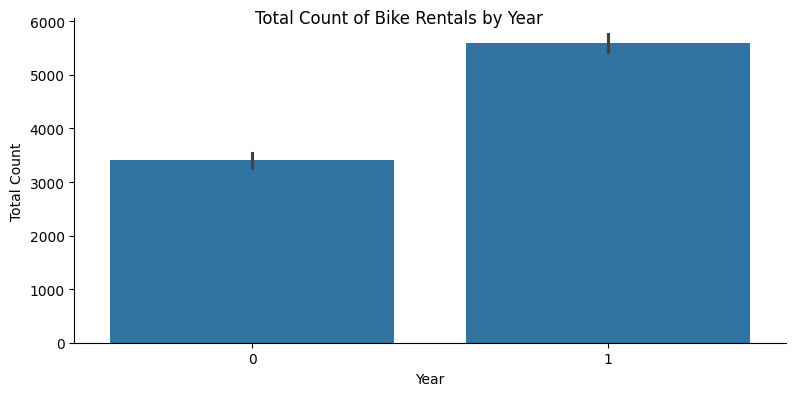

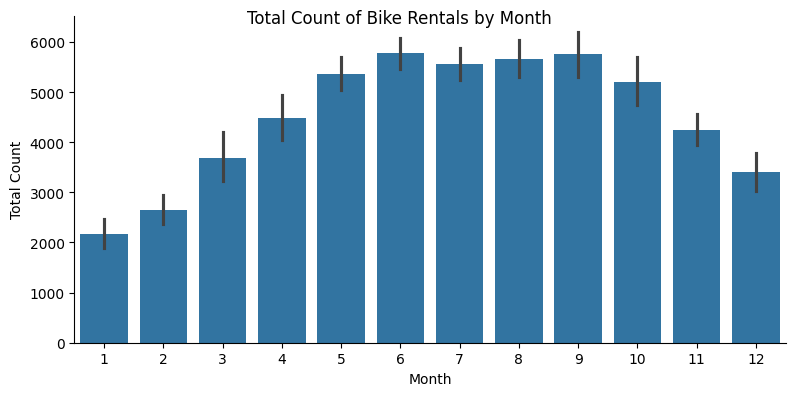

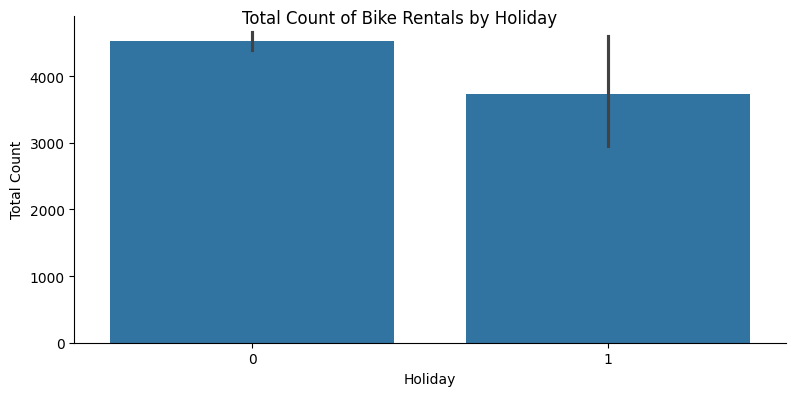

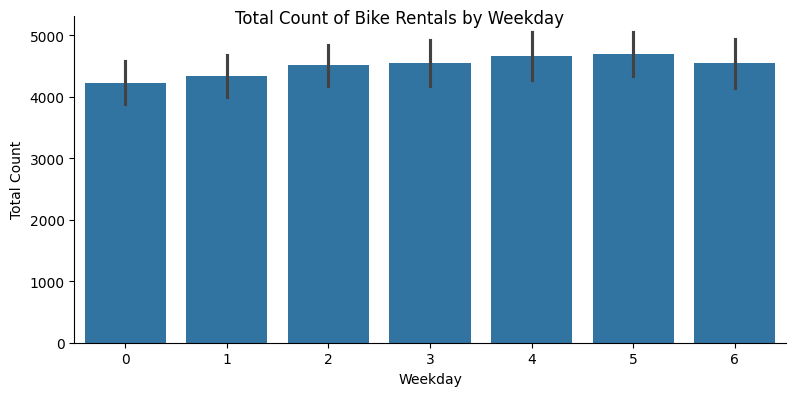

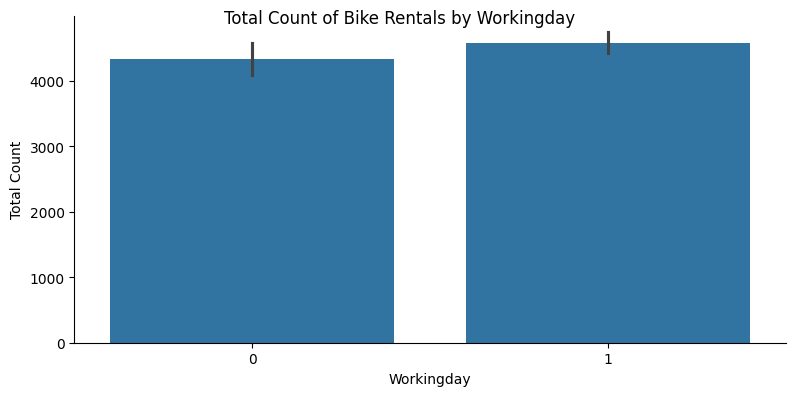

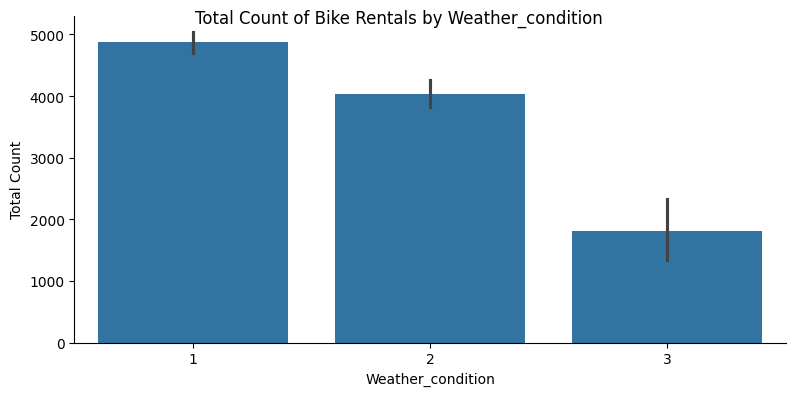

In [7]:
# Exploring categorical values
categorical_variables = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']  # Update with your actual categorical columns
for category in categorical_variables:
    g = sns.catplot(x=category, y='total_count', data=df_day, kind='bar', height=4, aspect=2)
    g.fig.suptitle(f'Total Count of Bike Rentals by {category.capitalize()}')  # Title for each factorplot
    g.set_axis_labels(category.capitalize(), 'Total Count')  # Set axis labels
    plt.show()


Converting categorical variables into dummy variables allows statistical models to interpret and use categorical data by encoding ut as numerical values. If we dont convert it models like linkear regression wont be able to understand and incorporate these variables.


In [8]:
df_day.head()

,id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df_day = pd.get_dummies(df_day, columns=['season', 'weather_condition'])
df_day.head()

,id,datetime,year,month,holiday,weekday,workingday,temp,atemp,humidity,...,casual,registered,total_count,season_1,season_2,season_3,season_4,weather_condition_1,weather_condition_2,weather_condition_3
0,1,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,...,331,654,985,1,0,0,0,0,1,0
1,2,2011-01-02,0,1,0,0,0,0.363478,0.353739,0.696087,...,131,670,801,1,0,0,0,0,1,0
2,3,2011-01-03,0,1,0,1,1,0.196364,0.189405,0.437273,...,120,1229,1349,1,0,0,0,1,0,0
3,4,2011-01-04,0,1,0,2,1,0.200000,0.212122,0.590435,...,108,1454,1562,1,0,0,0,1,0,0
4,5,2011-01-05,0,1,0,3,1,0.226957,0.229270,0.436957,...,82,1518,1600,1,0,0,0,1,0,0


# 3) What are the likely distributions of the numeric variables?

We can understand the distributions of numberic values through:
1. **Histograms**: Plotting histograms can give you a visual impression of the distribution of a variable.
2. **QQ Plots**: Quantile-Quantile plots compare the quantiles of the variable distribution to the quantiles of a theoretical distribution (such as a normal distribution). If the points lie on or near the reference line, the variable likely follows the theoretical distribution.
3. **Statistical Tests Like Shapiro Wilk Test**:  formally test the hypothesis that a sample is drawn from a particular distribution, such as a normal distribution.
4. **Descriptive Stats**: Mean, Meadian, Skewness, Kurtosis: can provide clues about the distribution.

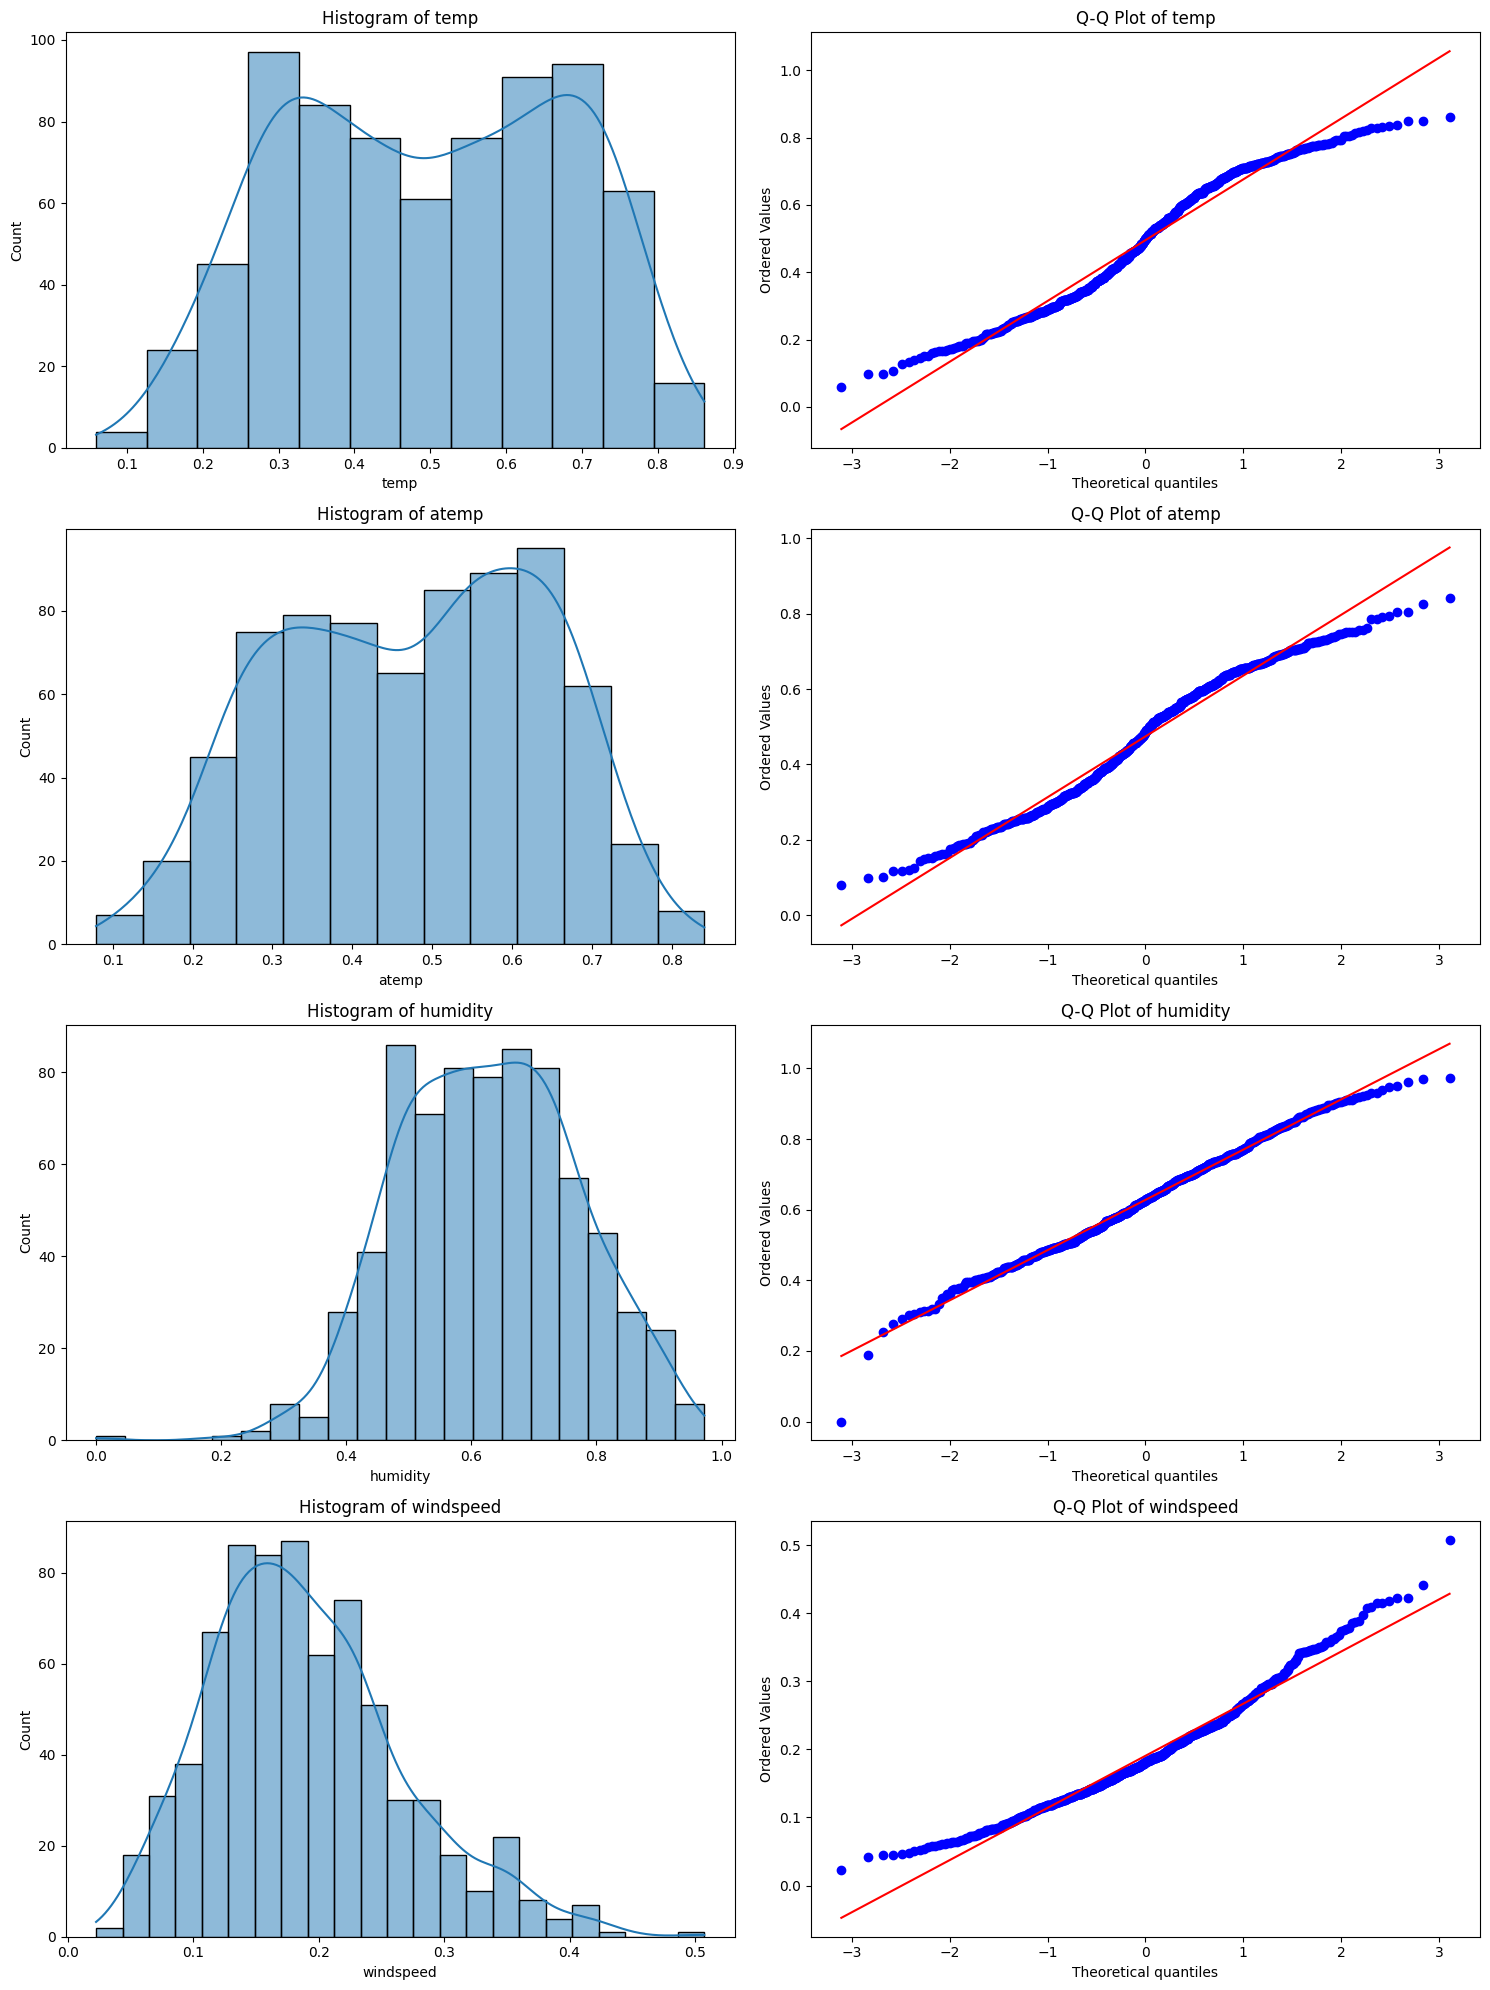

In [10]:
variables_to_check = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(15, 5 * len(variables_to_check)))

for i, var in enumerate(variables_to_check, 1):
    # Histogram
    plt.subplot(len(variables_to_check), 2, 2 * i - 1)
    sns.histplot(df_day[var], kde=True)
    plt.title(f'Histogram of {var}')

    # Q-Q plot
    plt.subplot(len(variables_to_check), 2, 2 * i)
    stats.probplot(df_day[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')

plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import shapiro
shapiro_results = {}
for column in variables_to_check:
    # The Shapiro-Wilk test null hypothesis is that the data is normally distributed
    # If the p-value is less than the chosen alpha level (commonly 0.05), then the null hypothesis is rejected
    stat, p_value = shapiro(df_day[column].dropna())  # Dropping NA values as Shapiro-Wilk can't handle them
    shapiro_results[column] = {'Statistic': stat, 'p-value': p_value}

# Convert the results dictionary to a DataFrame for better display
shapiro_df = pd.DataFrame.from_dict(shapiro_results, orient='index')

# Display the Shapiro-Wilk test results
print(shapiro_df)

           Statistic       p-value
temp        0.965912  5.146187e-12
atemp       0.973839  3.743482e-10
humidity    0.993346  2.482338e-03
windspeed   0.971232  8.424003e-11


Temperature (temp) and Feeling Temperature (atemp) may follow a distribution that is close to normal but with heavier tails, possibly a log-normal or a beta distribution, especially given the S-shaped Q-Q plots.

Humidity seems to have a skewed distribution, perhaps a beta distribution or another skewed distribution that can handle values bounded between 0 and 1.

Windspeed likely follows a log-normal or another positively skewed distribution due to its right-skewed histogram and Q-Q plot.

**In conclusion, none of the variables are perfectly normally distributed.**

# 4) Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

1. Correlation Analysis
2. Feature Importance from ML Models
3. Regression Cofficients
4. Lasso Regression (L1 Regularisation)
5. Ridge Regression (L2 Regularisation)


Also since we need to find total count we will focus on this only to be the dependent variable and ignore regestered and casual to reduce complexity of the problem.

Also casual' and 'registered' sum up to 'total_count', so including them as independent variables in a model predicting 'total_count' would lead to perfect multicollinearity and could inflate the predictive performance artificially.




In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# Define the independent variables (all columns except 'id', 'datetime', 'casual', 'registered', and 'total_count')
X = df_day.drop(columns=['id', 'datetime', 'casual', 'registered', 'total_count'])

# Define the dependent variable ('total_count')
y = df_day['total_count']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest for Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Lasso for Feature Selection
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)
lasso_coef = pd.Series(lasso.coef_, index=X_train.columns)

# OLS Regression for Coefficients
X_train_const = sm.add_constant(X_train)  # Adding a constant to the model
ols_model = sm.OLS(y_train, X_train_const).fit()
ols_coef = ols_model.params

# Combine the results
feature_selection_results = pd.DataFrame({
    'Feature Importance': feature_importances,
    'Lasso Coefficients': lasso_coef,
    'OLS Coefficients': ols_coef
})

# Display the feature selection results
print(feature_selection_results.sort_values('Feature Importance', ascending=False))


                     Feature Importance  Lasso Coefficients  OLS Coefficients
temp                           0.349600         4399.285834       4467.225281
year                           0.279667         2001.892576       1998.595902
atemp                          0.156837          700.414307        866.988484
humidity                       0.058576         -773.618351      -1018.363124
windspeed                      0.033227        -2003.441362      -2414.941399
season_4                       0.033026          491.340407        976.193811
month                          0.026701          -14.616660        -16.840702
season_1                       0.018011        -1212.475091       -731.985852
weekday                        0.015658           71.995118         71.057072
weather_condition_3            0.010855        -1279.442531       -764.203468
weather_condition_1            0.005430          546.458590       1032.266675
workingday                     0.004464          144.835416     

## Feature Importance (Random Forest)
Temp has highest feature importance. Year also has high score. Other variables atemp, humidity, season and windspeed appear to be low.

## Lasso Coefficients:
temp, atemp and year have large absolute values. Humidity and windspeed have negative coefficeints meaning higher values of these implies lower target values.

## OLS Coefficients
temp, atemp and year have significant coefficients. Remainder have lower importance.


**The variables temp, year, and atemp appear as important predictors across all three methods, indicating they are likely useful in predicting the target variable.**


The negative coefficients for humidity, windspeed, and holiday suggest that these conditions might lead to a decrease in bike rentals, which is logical from a practical standpoint as bad weather and holidays could deter people from renting bikes.



# 5) Which independent variables have missing data? How much?



In [13]:
missing_data = df_day.drop(columns=['total_count']).isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)


Series([], dtype: int64)


The output Series([], dtype: int64) indicates that there are no missing values in any of the independent variables in your dataset. This implies that imputing missing data is not needed.

# 6) Do the training and test sets have the same data?


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_stats = X_train.describe()
test_stats = X_test.describe()
print("Training Set Statistics:\n", train_stats)
print("\nTest Set Statistics:\n", test_stats)

Training Set Statistics:
              temp       atemp    humidity   windspeed    season_1    season_2  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.500171    0.478540    0.631180    0.190681    0.241438    0.258562   
std      0.181553    0.161669    0.142168    0.077410    0.428322    0.438220   
min      0.059130    0.079070    0.000000    0.022392    0.000000    0.000000   
25%      0.343333    0.346732    0.521562    0.134335    0.000000    0.000000   
50%      0.513333    0.503150    0.634375    0.179723    0.000000    0.000000   
75%      0.656041    0.609544    0.733958    0.233999    0.000000    1.000000   
max      0.861667    0.840896    0.962500    0.441563    1.000000    1.000000   

         season_3    season_4  weather_condition_1  weather_condition_2  \
count  584.000000  584.000000           584.000000           584.000000   
mean     0.258562    0.241438             0.628425             0.340753   
std      0.438220  

Both sets are representative of the overall data, with similar distributions in terms of means, standard deviations and other percentiles

# 7) In the predictor variables independent of all the other predictor variables?


To determune independence of predictor variables, we need to asses multicollinearity between the variables. Multicollinearity refferes to 2 or more variables being highly correlated with each other.
1. Correlation Matrix: Calculate the correlation coefficients between all pairs of predictors. High correlation coefficients (close to -1 or 1) suggest multicollinearity.
2. Variance Inflation Factor (VIF): VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value greater than 5 or 10 indicates a problematic level of multicollinearity for the corresponding predictor variable.



In [17]:
# Assume df_day is your DataFrame and it already includes dummy variables for season and weather
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Select only the features (independent variables) for VIF calculation
X = df_day.drop(['id', 'datetime', 'casual', 'registered', 'total_count'], axis=1)

# Ensure that dummy variables for 'season' and 'weather_condition' are already included in df_day
# Add constant for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


               Variable        VIF
0                 const   0.000000
1                  year   1.031477
2                 month   3.439387
3               holiday   1.085270
4               weekday   1.024192
5            workingday   1.078652
6                  temp  70.693666
7                 atemp  66.796436
8              humidity   1.947300
9             windspeed   1.228161
10             season_1        inf
11             season_2        inf
12             season_3        inf
13             season_4        inf
14  weather_condition_1        inf
15  weather_condition_2        inf
16  weather_condition_3        inf


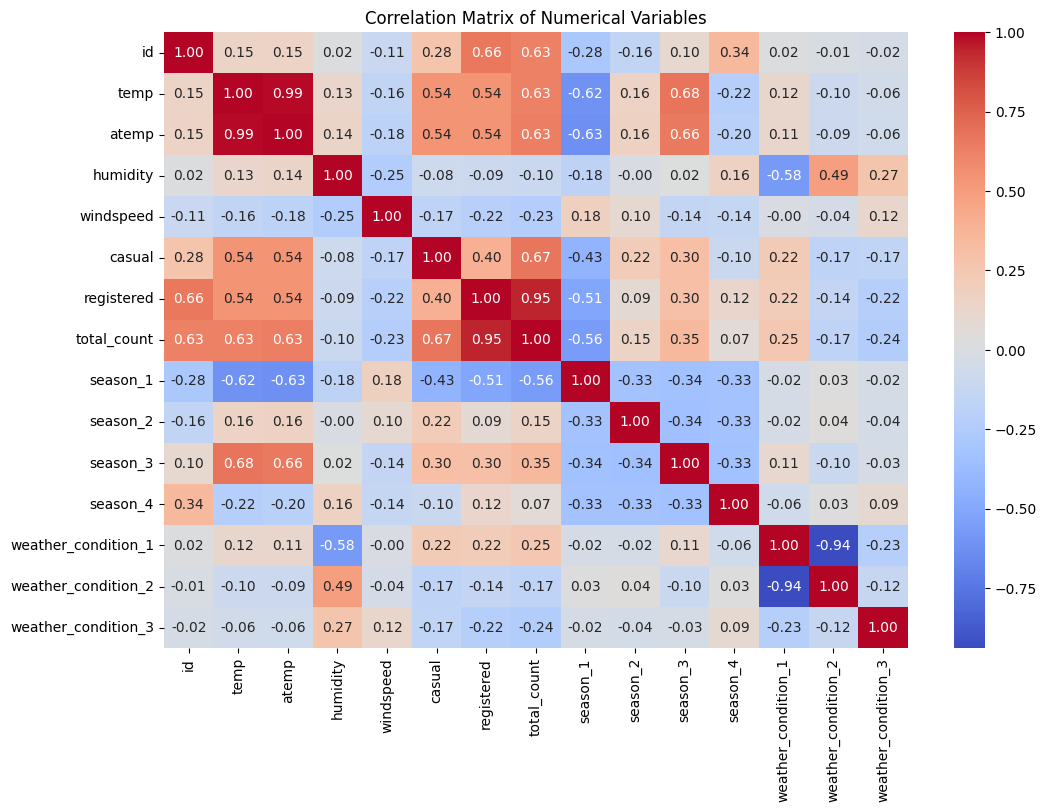

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df_day.columns
correlation_matrix = df_day[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


## Correlation Matrix Heatmap:
1. temp and atemp are very strongly correlated (0.99), which suggests that these two variables provide almost the same information. This high correlation can lead to multicollinearity if both variables are included in a regression model.

2. casual and registered both have a high correlation with total_count (0.67 and 0.95, respectively), which is expected because total_count is the sum of casual and registered.

## VIF Results:

1. temp and atemp have very high VIF scores (over 63), which confirms the multicollinearity issue suggested by the correlation matrix. Usually, one of these variables would be dropped from the model to avoid multicollinearity.
2. humidity and windspeed have low VIF scores, indicating they do not have multicollinearity issues with other variables.
3. The inf (infinity) values for casual, registered, and total_count suggest perfect multicollinearity, as these variables are directly related (since total_count is the sum of casual and registered). Therefore, in a regression model predicting total_count, you should not include casual and registered as predictors.


## Conclusion
You should avoid using both temp and atemp in the same model due to their high multicollinearity.
The id column should not be used as a predictor as it is likely just an identifier.
You should not include casual and registered as independent variables when the dependent variable is total_count because it would lead to data leakage and unreliable model estimates.
Focus on variables with lower VIF scores and lower correlations with each other when building your model to reduce the risk of multicollinearity.






# 8) Which predictor variables are the most important?

1. Temperature (temp) is identified as the most important predictor across all three methods.
2. Year is also consistently important, indicating the influence of trends over time on bike rentals.
3. Feeling temperature (atemp) is important but is likely redundant with temp due to their high correlation.
4. Humidity and windspeed show importance, especially given their negative relationship with the target variable.


# 9) Do the ranges of the predictor variables make sense?


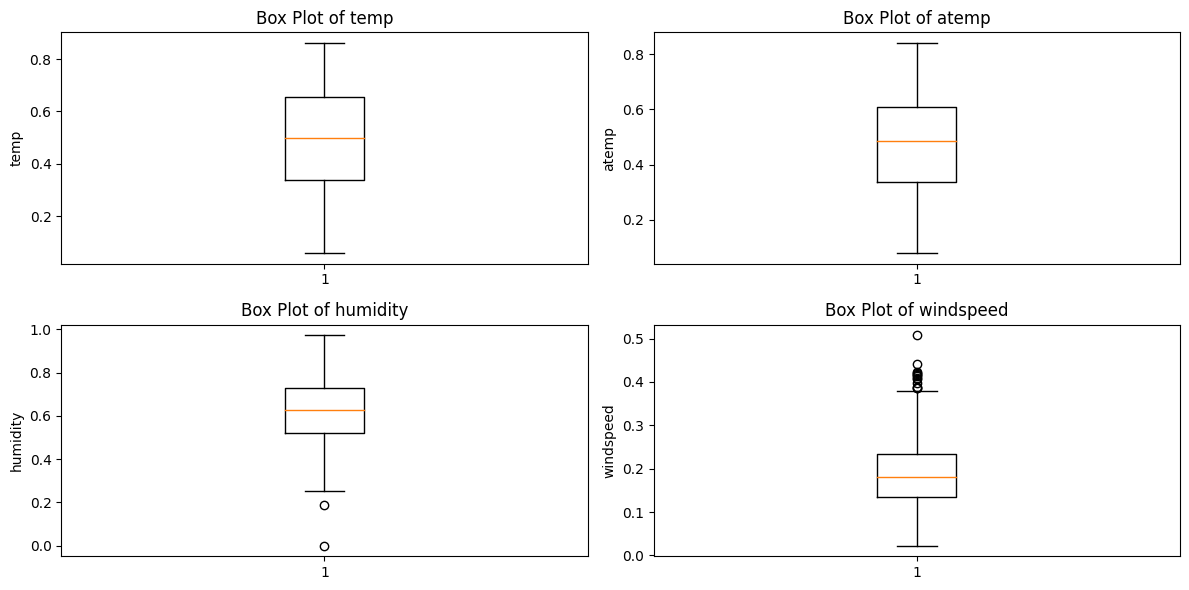

             temp       atemp    humidity   windspeed
count  731.000000  731.000000  731.000000  731.000000
mean     0.495385    0.474354    0.627894    0.190486
std      0.183051    0.162961    0.142429    0.077498
min      0.059130    0.079070    0.000000    0.022392
25%      0.337083    0.337842    0.520000    0.134950
50%      0.498333    0.486733    0.626667    0.180975
75%      0.655417    0.608602    0.730209    0.233214
max      0.861667    0.840896    0.972500    0.507463


In [19]:
numerical_predictors = ['temp', 'atemp', 'humidity', 'windspeed']

df_numerical = df_day[numerical_predictors]

summary_stats = df_numerical.describe()

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_predictors, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df_numerical[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

print(summary_stats)

Temperature: There are no visible outliers, and the distribution is fairly symmetric around the median.

Feeling Temperature (atemp): Like temp, there are no visible outliers, and the distribution is symmetric.

Humidity: There are a few outliers on the lower end, indicating some days with unusually low humidity.

Windspeed: There are several outliers on the higher end, indicating some days with unusually high windspeeds.



# 10) What are the distributions of the predictor variables?

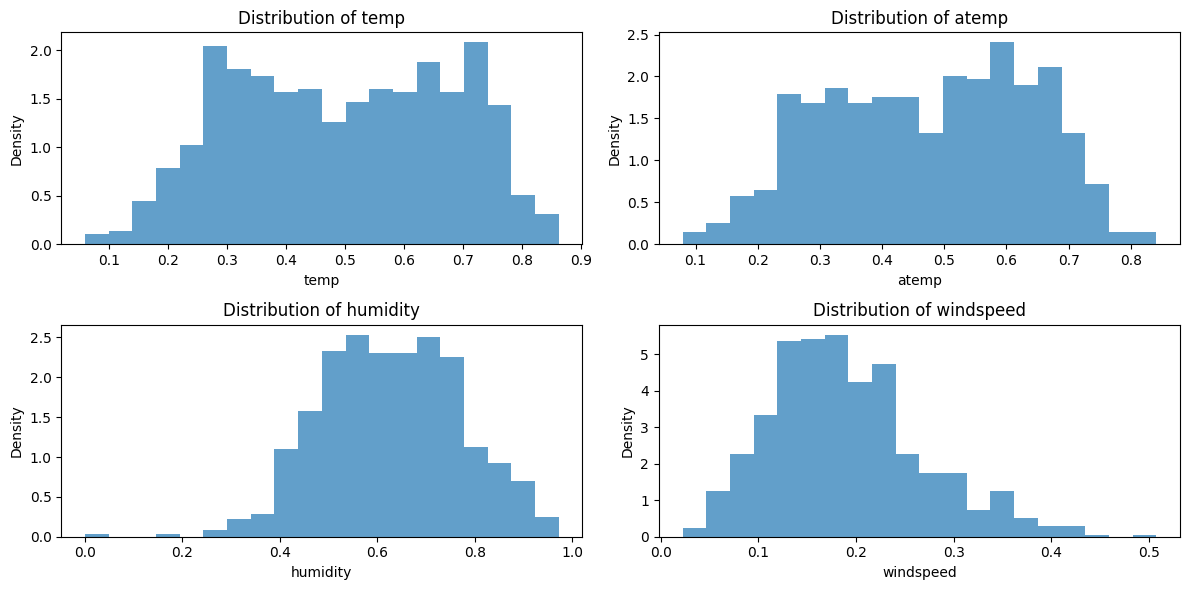

In [20]:
numerical_predictors = ['temp', 'atemp', 'humidity', 'windspeed']

# Subset the DataFrame to include only numerical predictor variables
df_numerical = df_day[numerical_predictors]

# Create histograms or density plots for each numerical variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_predictors, 1):
    plt.subplot(2, 2, i)
    plt.hist(df_numerical[col], bins=20, density=True, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

Temperature (temp):
The distribution of temperature appears to be bimodal, with two peaks, suggesting that there might be two prevalent temperatures where bike rentals are common. This could correspond to seasonal temperature variations.

Feeling Temperature (atemp):
The distribution of atemp is similar to temp, also appearing bimodal, which is expected as atemp is a measure related to the actual temperature but adjusted for human perception.

Humidity:
The humidity distribution is skewed to the right, meaning there's a concentration of days with higher humidity. The distribution is not uniform and there's a noticeable drop in frequency as humidity approaches 1, which indicates there are fewer days with very high humidity.


Windspeed:
The windspeed distribution is heavily skewed to the right, with most of the data concentrated on the lower side of the scale. This indicates that high windspeeds are less common.



Conclusion:
All four distributions suggest that the data has been normalized or scaled, as the ranges are confined between 0 and 1.
The presence of bimodal distributions for temperature and atemp might indicate seasonality or other factors that cause two different sets of conditions to be common.


# 11) Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# df = pd.read_csv('path_to_your_data.csv')

# Define your features and target variable
X = df_day.drop(['id', 'datetime', 'casual', 'registered', 'total_count'], axis=1)
y = df_day['total_count']

# Function to remove outliers using IQR
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Remove outliers for specified features
for feature in ['temp', 'atemp', 'humidity', 'windspeed']:
    df_day = remove_outliers(df_day, feature)

# Now, df_day is the dataset without outliers
X_no_outliers = df_day.drop(['id', 'datetime', 'casual', 'registered', 'total_count'], axis=1)
y_no_outliers = df_day['total_count']

# Split the data with outliers into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data without outliers into training and test sets
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Linear Regression with outliers
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression with outliers - R^2 Score:", r2_score(y_test, y_pred))

# Linear Regression without outliers
lr_no = LinearRegression()
lr_no.fit(X_train_no, y_train_no)
y_pred_no = lr_no.predict(X_test_no)
print("Linear Regression without outliers - R^2 Score:", r2_score(y_test_no, y_pred_no))

# Random Forest with outliers
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest with outliers - R^2 Score:", r2_score(y_test, y_pred_rf))

# Random Forest without outliers
rf_no = RandomForestRegressor(n_estimators=100, random_state=42)
rf_no.fit(X_train_no, y_train_no)
y_pred_rf_no = rf_no.predict(X_test_no)
print("Random Forest without outliers - R^2 Score:", r2_score(y_test_no, y_pred_rf_no))


Linear Regression with outliers - R^2 Score: 0.8379340549658565
Linear Regression without outliers - R^2 Score: 0.8368471655033454
Random Forest with outliers - R^2 Score: 0.8838452714697406
Random Forest without outliers - R^2 Score: 0.8743643366606173


1. In both the Linear Regression and Random Forest models, the presence of outliers seems to increase the R^2 score slightly.
2. This could indicate that the outliers may contain some information that is useful for the models, and removing them may result in the loss of this information.
3. It is also possible that the outliers may be exerting leverage on the Linear Regression model, given that this model is more sensitive to outliers, thus inflating the R^2 score when they are present.
4. The Random Forest model, which is generally more robust to outliers, also shows a decrease in performance when outliers are removed, but the decrease is smaller than that of the Linear Regression model.

# 12) Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [26]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Function to randomly remove data
def remove_data_randomly(df, percentage):
    df_removed = df.copy()
    for column in df_removed.select_dtypes(include=['float64', 'int64']).columns:
        n_null = int(percentage * len(df_removed))
        indices = df_removed.sample(n=n_null).index
        df_removed.loc[indices, column] = np.nan
    return df_removed

# Function to calculate the recovery error
def calculate_recovery_error(original, imputed):
    mse = mean_squared_error(original, imputed)
    return np.sqrt(mse)

# Define the imputers
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
knn_imputer = KNNImputer(n_neighbors=5)

# Remove 1%, 5%, and 10% of data randomly and impute it back
percentages = [0.01, 0.05, 0.10]
errors = pd.DataFrame(columns=['Percentage', 'Mean_Imputer', 'Median_Imputer', 'KNN_Imputer'])

for percentage in percentages:
    # Remove data randomly
    df_removed = remove_data_randomly(X, percentage)

    # Impute using different methods
    X_mean_imputed = mean_imputer.fit_transform(df_removed)
    X_median_imputed = median_imputer.fit_transform(df_removed)
    X_knn_imputed = knn_imputer.fit_transform(df_removed)

    # Calculate errors
    error_mean = calculate_recovery_error(X.values, X_mean_imputed)
    error_median = calculate_recovery_error(X.values, X_median_imputed)
    error_knn = calculate_recovery_error(X.values, X_knn_imputed)

    # Add errors to the DataFrame
    errors = errors.append({'Percentage': percentage,
                            'Mean_Imputer': error_mean,
                            'Median_Imputer': error_median,
                            'KNN_Imputer': error_knn}, ignore_index=True)

# Display the recovery errors
print(errors)


# Dictionary to store bias and percentage error for each imputation method
bias_and_percentage_errors = {}



   Percentage  Mean_Imputer  Median_Imputer  KNN_Imputer
0        0.01      0.007641        0.007742     0.005194
1        0.05      0.016083        0.016137     0.008734
2        0.10      0.023900        0.023866     0.015080


Mean Imputer: The RMSE increases as more data is removed, which is expected. However, the increase is not linear, suggesting that the mean imputation method is less effective as the amount of missing data increases.

Median Imputer: Similar to the mean imputer, the RMSE for the median imputer increases with the percentage of data removed. The median is usually more robust to outliers than the mean, but in this case, the RMSE is comparable to that of the mean imputation.

KNN Imputer: The KNN imputer has the lowest RMSE across all percentages of data removed. This indicates that the KNN imputer is more effective at recovering missing values than mean or median imputation. This could be due to its ability to use the structure of the data and relationships between features to make more accurate predictions for the missing values.


Conclusions:

The KNN imputation method outperforms mean and median imputation in terms of RMSE for all percentages of data removed. This suggests that KNN is a more effective method for imputing missing data in this dataset, particularly as the amount of missing data increases.

The effectiveness of imputation is inversely related to the amount of data removed. As more data is removed, it's harder for the imputation method to accurately predict the missing values, resulting in higher RMSE values.

There's a noticeable jump in RMSE from 1% to 5% and from 5% to 10% removal for all methods. This suggests that the larger the percentage of missing data, the more difficult it is to accurately impute.

Assessing Bias and Variance:

Bias: If the imputation method consistently overestimates or underestimates the missing values, this would introduce bias. To assess this, one could look at the mean of the residuals (the differences between the original and imputed values). A mean significantly different from zero would indicate bias.

Variance: This refers to the variability of the imputation error. If the residuals vary widely across different instances, this would indicate high variance. To assess variance, one could look at the standard deviation of the residuals.

Given the RMSE values, the KNN imputation method seems to be the most reliable for this particular dataset. It is less prone to error as the amount of missing data increases, suggesting that it's a robust choice for handling missing data in this context.







In [42]:
# Function to calculate the bias and variance
def calculate_bias_variance(original, imputed, missing_mask):
    bias = {}
    variance = {}
    for column in original.columns:
        # Calculate the differences for the imputed values
        differences = original[column][missing_mask] - imputed[column][missing_mask]
        # Bias: Mean of the differences
        bias[column] = differences.mean()
        # Variance: Variance of the differences
        variance[column] = differences.var()
    return bias, variance

# Dictionary to store the results
results = {}

for percentage in percentages:
    # Remove data randomly
    df_removed = remove_data_randomly(X_numerical, percentage)
    missing_mask = df_removed.isnull().any(axis=1)

    # Impute using different methods and calculate bias and variance
    for imputer_name, imputer in [('Mean', mean_imputer), ('Median', median_imputer), ('KNN', knn_imputer)]:
        imputed = imputer.fit_transform(df_removed)
        imputed_df = pd.DataFrame(imputed, columns=X_numerical.columns)
        bias, variance = calculate_bias_variance(X_numerical, imputed_df, missing_mask)
        results[(imputer_name, percentage)] = {
            'Bias': bias,
            'Variance': variance,
            'RMSE': calculate_recovery_error(X_numerical[missing_mask], imputed_df[missing_mask])
        }

# Display the results in a readable format
for (imputer_name, percentage), metrics in results.items():
    print(f"{imputer_name} Imputer, {percentage*100}% missing data:")
    print(f"  RMSE: {metrics['RMSE']}")
    print(f"  Bias:")
    for column, value in metrics['Bias'].items():
        print(f"    {column}: {value}")
    print(f"  Variance:")
    for column, value in metrics['Variance'].items():
        print(f"    {column}: {value}")
    print()  # Newline for readability


Mean Imputer, 1.0% missing data:
  RMSE: 0.07432779446866139
  Bias:
    temp: -0.01895102786108921
    atemp: 0.0030134306481846957
    humidity: -0.0011695004932912412
    windspeed: -0.015008631555840563
  Variance:
    temp: 0.012963750545074955
    atemp: 0.0036138020217121396
    humidity: 0.004864908479436187
    windspeed: 0.0008576050336573345

Median Imputer, 1.0% missing data:
  RMSE: 0.07403542546303968
  Bias:
    temp: -0.019714982142857152
    atemp: 0.00028357142857143657
    humidity: -0.0009556607142856931
    windspeed: -0.01271998214285715
  Variance:
    temp: 0.01305564985499041
    atemp: 0.003585800928105821
    humidity: 0.004863494653649141
    windspeed: 0.0006601705766570773

KNN Imputer, 1.0% missing data:
  RMSE: 0.054611064280795665
  Bias:
    temp: -0.005459271428571436
    atemp: 0.002728649999999999
    humidity: 0.012139949999999998
    windspeed: -0.015539332142857146
  Variance:
    temp: 0.0025524685981961914
    atemp: 0.0012564414843870377
    h

The KNN Imputer appears to perform best in terms of both bias and variance, particularly at lower percentages of missing data. The Mean and Median Imputers also perform well with very low bias, but they tend to have higher variance as the percentage of missing data increases.

References:
1. ChatGPT: Refered concepts and code snippets
2. https://www.kaggle.com/code/rajmehra03/bike-sharing-demand-rmsle-0-3194 - Similar dataset, refered the approach
3. https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook - learnt about EDA